# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is the "Bike Sharing". 

There are two data files: "BikeSharing_training.csv" and "BikeSharing_Xtest.csv"<br/>
Both files have the following fields, except cnt which is not available in "BikeSharing_Xtest.csv"

Features:
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

Target:
- cnt: count of total rental bikes


Training dataset, "BikeSharing_training.csv", contains 300 rows and 12 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "BikeSharing_Xtest.csv", contains 200 rows and 11 columns. This is the test set which only contains the features.<br/>

Your goal is to predict the number of total rental bikes (cnt) based on the features.

In [64]:
import csv
import numpy as np
import pandas as pd

Load the training data and View the first 5 lines

In [101]:
# Load the data
training = pd.read_csv("BikeSharing_training.csv")

# Show the first 5 lines
training.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,12,16,0,5,1,1,0.42,0.4242,0.47,0.1940,283
1,4,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,330
2,3,9,1,0,0,0,2,0.62,0.5606,0.88,0.0000,88
3,3,6,22,0,3,1,1,0.70,0.6364,0.42,0.1940,183
4,3,7,12,0,1,1,2,0.80,0.7424,0.52,0.1642,314


## Data Exploration
We can plot a histogram of the dataframe for the features: "temp", "atemp","hum","windspeed" to understand the distributions of the continuous values.<br/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e82d8520>,
      dtype=object)

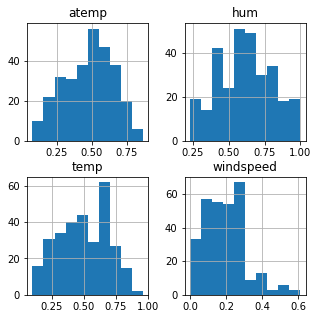

In [66]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
%matplotlib inline

training[['temp', 'atemp', 'hum', 'windspeed']].hist(figsize = (5,5))

##### Q1. What can you infer from the histograms? <br/>

Atemp and hum appear to be fairly normally distributed, temp has a triangular left skewed distribution, and windspeed has a beta distribution with a right skew. The location of our bikesharing dataset appears to be in a warm and relatively humid, area. Atemp, hum, and temp are spread between 0 and 1, while windspeed is between 0 and 0.6.

Compute the correlation matrix to get an understanding of the correlation between cnt and the other features.<br/>



In [67]:
training.corr().style.background_gradient(cmap='RdYlGn')

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.795990,-0.046306,-0.057180,-0.049248,0.087355,0.097812,0.403317,0.406946,0.155086,-0.110663,0.225385
mnth,0.795990,1.000000,0.000608,-0.012655,0.001790,0.045749,0.098688,0.270690,0.265519,0.116613,-0.005633,0.144026
hr,-0.046306,0.000608,1.000000,0.104970,0.029337,-0.083801,-0.117088,0.049154,0.042834,-0.375612,0.162829,0.387503
holiday,-0.057180,-0.012655,0.104970,1.000000,-0.065359,-0.216498,-0.059273,0.023122,0.020936,-0.064204,-0.043506,0.018659
weekday,-0.049248,0.001790,0.029337,-0.065359,1.000000,0.096844,-0.088959,-0.057797,-0.071621,-0.098027,0.073404,0.067401
workingday,0.087355,0.045749,-0.083801,-0.216498,0.096844,1.000000,0.131374,-0.007330,-0.001266,0.168470,-0.000534,-0.072353
weathersit,0.097812,0.098688,-0.117088,-0.059273,-0.088959,0.131374,1.000000,-0.014367,-0.018496,0.403589,-0.047412,-0.167125
temp,0.403317,0.270690,0.049154,0.023122,-0.057797,-0.007330,-0.014367,1.000000,0.992783,-0.037122,-0.096506,0.435036
atemp,0.406946,0.265519,0.042834,0.020936,-0.071621,-0.001266,-0.018496,0.992783,1.000000,-0.017675,-0.126852,0.430083
hum,0.155086,0.116613,-0.375612,-0.064204,-0.098027,0.168470,0.403589,-0.037122,-0.017675,1.000000,-0.228720,-0.321508


##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
The diagonal is the correlation between a data attribute and itself. Becuase the data is exactly the same, they are perfectly correlated

##### Q3. Why is the matrix symmetric along diagonal?<br/>
This matrix is symmetric becuase the columns and rows are symmetric. The calculated correlations are duplicated on either side.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with cnt as the outcome, which one would you choose and why? <br/>
I would choose temp as the predictor becuase it has the highest absolute value of all the correlated variables with cnt.

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on "temp", "atemp","hum","windspeed"


In [68]:
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(training[['temp', 'atemp', 'hum', 'windspeed']])

array([[-4.07572539e-01, -3.03587659e-01, -7.90860172e-01,
         5.40063916e-04],
       [ 6.55705186e-03,  4.47228379e-02, -3.59579915e-01,
         1.83266598e+00],
       [ 6.27751439e-01,  4.80398344e-01,  1.41945115e+00,
        -1.58692054e+00],
       ...,
       [-8.21702131e-01, -9.12843644e-01,  2.33430439e-01,
         4.89052424e-01],
       [ 7.31283836e-01,  7.41918602e-01,  1.79520407e-01,
        -1.58692054e+00],
       [-5.11104937e-01, -3.90377898e-01, -8.44770204e-01,
         2.19925482e+00]])

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Z score normalization allows for all attributes to be compared by their distance from that attributes distribution mean. This is beneficial in that comparisons can be made between attributes that do not have similar units. 

The disadvantage is that z score normilization assumes a normal distribution, which is not always the case.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Z score normalization would be reasonable for all but windspeed (becuase of the spread). But, as normalization has already been done (scaled between 0 and 1), unless we are concerned about being able to compare the variability from the mean, it is not necessary.

### One-Hot Encoding

"temp", "atemp","hum" and "windspeed" are continuous values whereas the others contain discrete values. E.g. "mnth" can only take on the integers from 1 to 12. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Perform one-hot encoding on all the categorical features and print the shape of your encoded array

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Print the shape of your encoded X
# encoding all but the binary categories
array = OneHotEncoder().fit_transform(training.iloc[:,np.r_[0:3, 4, 6]])
array.shape

(300, 50)

##### Q7. What are the advantages and disadvantages of using One-hot encoding?<br/>
The categories that are already binary are converted when they dont need to be. Also, if a category is not present in the training set, then it wont be encoded. For example, weathersit has a 4th category that doesn't present itself in this particular training set, and so OneHotEncoder doesnt create a column for it.

It is also possible that, depending on the number of categories, that the feature set may grow extremely large.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "cnt".

In [70]:
from sklearn.linear_model import LinearRegression

# merge encoded categories onto the original dataframe for modeling
category_array = OneHotEncoder().fit_transform(training.iloc[:,np.r_[0:3, 4, 6]])
new_df = pd.DataFrame(category_array.toarray())
training_new = training.drop(training.columns[np.r_[0:3, 4, 6]], axis=1)
training_new = training_new.join(new_df)
training_new

,holiday,workingday,temp,atemp,hum,windspeed,cnt,0,1,2,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0.42,0.4242,0.47,0.1940,283,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0,0.50,0.4848,0.55,0.4179,330,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0.62,0.5606,0.88,0.0000,88,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,0.70,0.6364,0.42,0.1940,183,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0.80,0.7424,0.52,0.1642,314,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0.26,0.2727,0.81,0.1045,41,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
296,0,1,0.54,0.5152,0.83,0.1940,172,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
297,0,1,0.34,0.3182,0.66,0.2537,89,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
298,0,0,0.64,0.6061,0.65,0.0000,45,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [71]:
# Bulding and fitting the Linear Regression model 
cols = [i for i in training_new.columns if i != 'cnt']
model = LinearRegression().fit(training_new[cols], training[['cnt']])

# Evaluating the Linear Regression model by computing MSE on training set
from sklearn.metrics import mean_squared_error
y_pred = model.predict(training_new[cols])
y_true = training_new[['cnt']]
mean_squared_error(y_true, y_pred)

11285.282916666667

###### Q8. Print the value of bhat

In [72]:
# coefficients for all encoded variables
model.coef_

array([[-3.59189798e+11, -3.59189798e+11,  8.07565125e+02,
        -5.02757233e+02, -5.18418884e+01, -1.05887909e+02,
        -5.51139729e+14, -5.51139729e+14, -5.51139729e+14,
        -5.51139729e+14,  3.30508439e+14,  3.30508439e+14,
         3.30508439e+14,  3.30508439e+14,  3.30508439e+14,
         3.30508439e+14,  3.30508439e+14,  3.30508439e+14,
         3.30508439e+14,  3.30508439e+14,  3.30508439e+14,
         3.30508439e+14, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -5.87346310e+13, -5.87346310e+13,
        -5.87346310e+13, -6.06881116e+14, -6.06521927e+14,
        -6.06521927e+14, -6.06521927e+14, -6.06521927e+1

In [73]:
# model intercept
model.intercept_

array([1.35903639e+15])

###### Q9. Is there a problem of multicolinearity? Explain what you can do<br/>
There is a problem of multicolinearity. We can observe this by the nearly perfect correlation between temp and atemp. One of the variables should be dropped.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [74]:
from sklearn.metrics import r2_score

#### R2 score for model with "temp" as predictor and "cnt" as outcome

In [75]:
model_temp = LinearRegression().fit(training[['temp']], training[['cnt']])
temp_pred = model_temp.predict(training[['temp']])

# Print R2 score
r2_score(y_true, temp_pred)

0.18925663564676132

#### R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [76]:
model_temp = LinearRegression().fit(training[['temp', 'hum']], training[['cnt']])
temp_hum_pred = model_temp.predict(training[['temp', 'hum']])

# Print R2 score
r2_score(y_true, temp_hum_pred)

0.2826295103178843

#### R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [77]:
model_temp = LinearRegression().fit(training[['temp', 'hum', 'atemp']], training[['cnt']])
a_temp_hum_pred = model_temp.predict(training[['temp', 'hum', 'atemp']])

# Print R2 score
r2_score(y_true, a_temp_hum_pred)

0.28380026219213783

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

#### Adjusted R2 score for model with "temp" as predictor and "cnt" as outcome

In [78]:
def adjusted_R2(r2, n, k):
    """Thie function calculates an adjusted score from an unadjusted score"""
    return 1-((1-r2)*(n-1)/(n-k-1))

# Print Adjusted R2 score
adjusted_R2(r2_score(y_true, temp_pred), 300, 1)

0.18653602033013972

#### Adjusted R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [79]:
# Print Adjusted R2 score
adjusted_R2(r2_score(y_true, temp_hum_pred), 300, 2)

0.2777987326095872

#### Adjusted R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [80]:
# Print Adjusted R2 score
adjusted_R2(r2_score(y_true, a_temp_hum_pred), 300, 3)

0.27654148106570675

### K-fold Cross-Validation

However, adjusted R2 is not enough to help us achieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [121]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(x, y):
    """This function outputs the average of 5 caluclated mean squared errors.  
    Essentially a reproduction of sklearns cross fold validation function... using a static 5 k folds."""    
    mse_l = [] # empty list for mse
    for i in range(5):
        # create the smaller test fold first by calculating/selecting its index range
        x_test_fold = x.iloc[int(i*len(x)/5):int((i+1)*len(x)/5),:] 
        x_training_fold = x.drop(x.index[int(i*len(x)/5):int((i+1)*len(x)/5)]) # all rows except those selected for the test fold

        y_test_fold = y.iloc[int(i*len(x)/5):int((i+1)*len(y)/5),:]
        y_training_fold = y.drop(y.index[int(i*len(y)/5):int((i+1)*len(y)/5)])

        # run regression
        reg = LinearRegression().fit(x_training_fold, y_training_fold)
        fold_predict = reg.predict(x_test_fold)

        mse_l.append(mean_squared_error(y_test_fold, fold_predict))

    return sum(mse_l)/len(mse_l)

# By using your above function, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations

cols = [i for i in training.columns if i != 'cnt'] # return all columns names but the dependent variable

all_combo = [] # empty list to house the output of combinations
for i in range(len(cols)): # loop through n choose i to get all combinations of various i
    all_combo += list(combinations(cols, i+1)) 
    ### the +1 is essential above. Combinations of 0 length must be removed as regressions cannot be run on dataframes with 0 attributes. 

all_mse = [] # empty list to house the mse calculated from combinations
for n, i in enumerate(all_combo):
    all_mse.append([cross_val_mse(training[list(i)], training[['cnt']]), n])

In [122]:
# Print the best features 
all_combo[min(all_mse)[1]]

('season', 'mnth', 'hr', 'weekday', 'weathersit', 'atemp', 'hum')

### Test your model
Now, apply your best model to predict the target values from the test feature set "BikeSharing_Xtest.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [124]:
# Output your prediction on test set as y_pred. It should be a 200 x 1 vector.
test = pd.read_csv('BikeSharing_Xtest.csv') # load test data

# onehotencoding relevant categorical variables for better fit and merging dataframes
model_category_array = OneHotEncoder().fit_transform(training[['season', 'mnth', 'hr', 'weekday', 'weathersit']])
model_new_df = pd.DataFrame(model_category_array.toarray())
training_model = training.drop(training[['season', 'mnth', 'hr', 'weekday', 'weathersit']], axis=1)
training_model = training_model.join(model_new_df)

final_cols = [i for i in training_model.columns if i != 'cnt']

final_model = LinearRegression().fit(training_model[final_cols], training_model[['cnt']])

# onehotencoding same relevant categorical variables for better fit and merging dataframes on test dataframe
test_category_array = OneHotEncoder().fit_transform(test[['season', 'mnth', 'hr', 'weekday', 'weathersit']])
test_new_df = pd.DataFrame(test_category_array.toarray())
test_model = test.drop(test[['season', 'mnth', 'hr', 'weekday', 'weathersit']], axis=1)
test_model = test_model.join(test_new_df)

# y_pred =
y_pred = final_model.predict(test_model)
print(y_pred.shape)
y_pred[0:5]

(200, 1)


array([[348.25],
       [143.75],
       [430.25],
       [405.5 ],
       [387.75]])

In [84]:
#end